#**Análisis Descriptivo de Estrés y Anomalías de Consumo: Indicadores de Riesgo de Fallas en la Red Eléctrica.**

# Resumen del Proyecto

Este proyecto analiza el comportamiento del sistema eléctrico de EDEEESTE, buscando comprender cómo varían las fallas (apagones) en relación con el consumo de energía a lo largo del tiempo.
A partir de datos históricos mensuales, se desarrolla un Indicador de Estrés Sistémico (IES) que permite medir qué tan “estresada” está la red eléctrica en distintos periodos.

El propósito principal es identificar los meses más críticos, detectar patrones estacionales de riesgo y ofrecer una base analítica que ayude a planificar mantenimientos preventivos y mejorar la confiabilidad del servicio.

En pocas palabras, el proyecto busca convertir los datos de consumo y fallas en información útil para la toma de decisiones, fortaleciendo la eficiencia y estabilidad de la red eléctrica.

En si esos los dataset del proyecto, lo hicimos en google colab, por si surge un error al ejecutarlo en jupyter notebook, los 4 dataset llamados

Estadisticas-de-Energia-Entregada-y-Perdida-por-Provincia-Agosto-2025.
Estadisticas-de-Averias-y-Emergencias-Atendidas-por-Provincia-agosto-2025 (1).
Estadisticas-de-Bajas-o-cancelaciones-por-provincias-agosto-2025.
Estadisticas-de-Facturacion-Por-Tarifa-y-Rango-De-Consumo-Agosto-2025.

seran ejecutados en la siguiente celda.


In [1]:
import os
import pandas as pd

from google.colab import files
uploaded = files.upload()

# List files in the /content directory
files = os.listdir('/content')
print("Files in /content directory:")
for file in files:
    print(file)

# Read datasets into dataframes
dataframes = {}
for file in files:
    file_path = os.path.join('/content', file)
    try:
        if file.endswith('.csv'):
            dataframes[file] = pd.read_csv(file_path)
        elif file.endswith('.xlsx'):
            dataframes[file] = pd.read_excel(file_path)
        elif file.endswith('.ods'):
            # Requires the odfpy library
            !pip install odfpy
            dataframes[file] = pd.read_excel(file_path, engine='odf')
        else:
            print(f"Skipping unsupported file type: {file}")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Display the first few rows of each dataframe
for name, df in dataframes.items():
    print(f"\n--- First 5 rows of {name} ---")
    display(df.head())

Saving Estadisticas-de-Energia-Entregada-y-Perdida-por-Provincia-Agosto-2025.ods to Estadisticas-de-Energia-Entregada-y-Perdida-por-Provincia-Agosto-2025.ods
Saving Estadisticas-de-Averias-y-Emergencias-Atendidas-por-Provincia-agosto-2025 (1).xlsx to Estadisticas-de-Averias-y-Emergencias-Atendidas-por-Provincia-agosto-2025 (1).xlsx
Saving Estadisticas-de-Bajas-o-cancelaciones-por-provincias-agosto-2025.xlsx to Estadisticas-de-Bajas-o-cancelaciones-por-provincias-agosto-2025.xlsx
Saving Estadisticas-de-Facturacion-Por-Tarifa-y-Rango-De-Consumo-Agosto-2025.ods to Estadisticas-de-Facturacion-Por-Tarifa-y-Rango-De-Consumo-Agosto-2025.ods
Files in /content directory:
.config
Estadisticas-de-Energia-Entregada-y-Perdida-por-Provincia-Agosto-2025.ods
Estadisticas-de-Bajas-o-cancelaciones-por-provincias-agosto-2025.xlsx
Estadisticas-de-Averias-y-Emergencias-Atendidas-por-Provincia-agosto-2025 (1).xlsx
Estadisticas-de-Facturacion-Por-Tarifa-y-Rango-De-Consumo-Agosto-2025.ods
sample_data
Skipping

,PROVINCIA,ENERGIA ENTREGADA,MES,ANO,Unnamed: 4
0,MONSENOR NOUEL,0.00,ENERO,2017,NaN
1,EL SEIBO,4900165.41,ENERO,2017,NaN
2,DISTRITO NACIONAL,66684574.68,ENERO,2017,NaN
3,HATO MAYOR,5179208.17,ENERO,2017,NaN
4,LA ALTAGRACIA,19982012.41,ENERO,2017,NaN



--- First 5 rows of Estadisticas-de-Bajas-o-cancelaciones-por-provincias-agosto-2025.xlsx ---


,provincia,estado,bajas,mes,año
0,distrito nacional,baja forzada,297,enero,2017
1,distrito nacional,baja voluntaria,396,enero,2017
2,el seibo,baja forzada,66,enero,2017
3,el seibo,baja voluntaria,55,enero,2017
4,hato mayor,baja forzada,93,enero,2017



--- First 5 rows of Estadisticas-de-Averias-y-Emergencias-Atendidas-por-Provincia-agosto-2025 (1).xlsx ---


,provincia,tipo de averia y emergencia,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre,ano
0,distrito nacional,alumbrado publico,0.0,0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2017
1,distrito nacional,falta de energia,1652.0,1722,1887.0,1631,2013,1991.0,1937.0,2291.0,2153.0,2761.0,2362.0,2130.0,2017
2,distrito nacional,niveles de tension,227.0,227,261.0,222,316,272.0,291.0,327.0,291.0,515.0,382.0,358.0,2017
3,distrito nacional,otros,1.0,0,0.0,0,0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2017
4,distrito nacional,probable defecto o falla,13.0,6,6.0,11,6,11.0,20.0,14.0,59.0,9.0,14.0,7.0,2017



--- First 5 rows of Estadisticas-de-Facturacion-Por-Tarifa-y-Rango-De-Consumo-Agosto-2025.ods ---


,MEDIO,CANTIDAD CLIENTES,CONSUMO PROMEDIO EN KWH,MES,ANO
0,BAJA TENSION CON DEMANDA (BTD),1640,6382.375610,ENERO,2017
1,BAJA TENSION CON DEMANDA HORARIA (BTH),56,2484.303571,ENERO,2017
2,BAJA TENSION SIMPLE 2 (BTS 2),778447,139.765948,ENERO,2017
3,BAJA TENSION SIMPLE 2 (BTS 2),99424,325.298047,ENERO,2017
4,MEDIA TENSION CON DEMANDA 1 (MTD 1),2478,13465.146893,ENERO,2017


# Task
Load the datasets from the `data` directory, clean the data by converting the month names in the relevant column to their numerical representation (1-12), and display the cleaned dataframes.

## Iterate through dataframes

### Subtask:
Iterate through each dataframe in the `dataframes` dictionary.


Iteración inicial sobre los dataframes cargados
Esta celda recorre cada uno de los dataframes almacenados en el diccionario `dataframes`
para imprimir su nombre y contenido, preparando el terreno para el procesamiento posterior.

In [ ]:
for name, df in dataframes.items():
    print(f"Procesando {df} dataframe: {name}")
    # Los siguientes pasos se realizarán dentro de este bucle

Procesando                 provincia tipo de averia y emergencia   enero febrero  \
0       distrito nacional           alumbrado publico     0.0       0   
1       distrito nacional            falta de energia  1652.0    1722   
2       distrito nacional          niveles de tension   227.0     227   
3       distrito nacional                       otros     1.0       0   
4       distrito nacional    probable defecto o falla    13.0       6   
..                    ...                         ...     ...     ...   
343  san pedro de macoris               riego de vida   113.0     134   
344         santo domingo            falta de energia  9528.0    9994   
345         santo domingo          níveles de tension  1797.0    2059   
346         santo domingo    probable defecto o falla    29.0      34   
347         santo domingo               riego de vida   698.0     752   

       marzo  abril   mayo    junio    julio   agosto  septiembre  octubre  \
0        0.0      0      0      0.

## Identify month column

### Subtask:
For each dataframe, identify the column that contains the month names.


In [ ]:
month_columns = {}
for name, df in dataframes.items():
    print(f"Procesando dataframe: {name}")
    month_col = None
    for col in df.columns:
        # Verificar si el nombre de la columna indica el mes
        if 'mes' in col.lower():
            # Valores de muestra para confirmar
            if df[col].dtype == 'object':
                sample_values = df[col].dropna().unique()
                if any(isinstance(val, str) and val.lower() in ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'] for val in sample_values[:5]):
                    month_col = col
                    break
    month_columns[name] = month_col
    if month_col:
        print(f"Columna de mes identificada: {month_col}")
    else:
        print("No se pudo identificar la columna de mes.")

print("\nColumnas de mes identificadas para cada dataframe:")
print(month_columns)

Procesando dataframe: Estadisticas-de-Averias-y-Emergencias-Atendidas-por-Provincia-agosto-2025 (1).xlsx
No se pudo identificar la columna de mes.
Procesando dataframe: Estadisticas-de-Energia-Entregada-y-Perdida-por-Provincia-Agosto-2025.ods
Columna de mes identificada: MES
Procesando dataframe: Estadisticas-de-Bajas-o-cancelaciones-por-provincias-agosto-2025.xlsx
Columna de mes identificada: mes
Procesando dataframe: Estadisticas-de-Facturacion-Por-Tarifa-y-Rango-De-Consumo-Agosto-2025.ods
Columna de mes identificada: MES

Columnas de mes identificadas para cada dataframe:
{'Estadisticas-de-Averias-y-Emergencias-Atendidas-por-Provincia-agosto-2025 (1).xlsx': None, 'Estadisticas-de-Energia-Entregada-y-Perdida-por-Provincia-Agosto-2025.ods': 'MES', 'Estadisticas-de-Bajas-o-cancelaciones-por-provincias-agosto-2025.xlsx': 'mes', 'Estadisticas-de-Facturacion-Por-Tarifa-y-Rango-De-Consumo-Agosto-2025.ods': 'MES'}


## Cambios de los meses a numero



### Subtask:
Create a mapping from Spanish month names to their corresponding numerical representation (1-12).


**Reasoning**:
Create a dictionary to map Spanish month names to their numerical representation.



In [ ]:
month_to_number = {
    'enero': 1,
    'febrero': 2,
    'marzo': 3,
    'abril': 4,
    'mayo': 5,
    'junio': 6,
    'julio': 7,
    'agosto': 8,
    'septiembre': 9,
    'octubre': 10,
    'noviembre': 11,
    'diciembre': 12
}
print(month_to_number)

{'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6, 'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12}


Conversión de nombres de meses a valores numéricos
Aplica el diccionario de mapeo creado anteriormente para transformar los nombres de los meses
en español (enero, febrero, etc.) a sus valores numéricos correspondientes (1-12) en cada dataframe
que tenga una columna de mes identificada


In [ ]:
for name, df in dataframes.items():
    month_col = month_columns.get(name)
    if month_col:
        print(f"Convirtiendo nombres de mes a números para el dataframe: {name} en la columna: {month_col}")
        # Convertir la columna a cadena en minúsculas para asegurar un mapeo consistente
        df[month_col] = df[month_col].str.lower().map(month_to_number)
    else:
        print(f"No se identificó la columna de mes para el dataframe: {name}")

# Mostrar las primeras filas de cada dataframe modificado para verificar la conversión
for name, df in dataframes.items():
    print(f"\n--- Primeras 5 filas de {name} después de la conversión del mes ---")
    display(df.head())

No se identificó la columna de mes para el dataframe: Estadisticas-de-Averias-y-Emergencias-Atendidas-por-Provincia-agosto-2025 (1).xlsx
Convirtiendo nombres de mes a números para el dataframe: Estadisticas-de-Energia-Entregada-y-Perdida-por-Provincia-Agosto-2025.ods en la columna: MES
Convirtiendo nombres de mes a números para el dataframe: Estadisticas-de-Bajas-o-cancelaciones-por-provincias-agosto-2025.xlsx en la columna: mes
Convirtiendo nombres de mes a números para el dataframe: Estadisticas-de-Facturacion-Por-Tarifa-y-Rango-De-Consumo-Agosto-2025.ods en la columna: MES

--- Primeras 5 filas de Estadisticas-de-Averias-y-Emergencias-Atendidas-por-Provincia-agosto-2025 (1).xlsx después de la conversión del mes ---


,provincia,tipo de averia y emergencia,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre,ano
0,distrito nacional,alumbrado publico,0.0,0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2017
1,distrito nacional,falta de energia,1652.0,1722,1887.0,1631,2013,1991.0,1937.0,2291.0,2153.0,2761.0,2362.0,2130.0,2017
2,distrito nacional,niveles de tension,227.0,227,261.0,222,316,272.0,291.0,327.0,291.0,515.0,382.0,358.0,2017
3,distrito nacional,otros,1.0,0,0.0,0,0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2017
4,distrito nacional,probable defecto o falla,13.0,6,6.0,11,6,11.0,20.0,14.0,59.0,9.0,14.0,7.0,2017



--- Primeras 5 filas de Estadisticas-de-Energia-Entregada-y-Perdida-por-Provincia-Agosto-2025.ods después de la conversión del mes ---


,PROVINCIA,ENERGIA ENTREGADA,MES,ANO,Unnamed: 4
0,MONSENOR NOUEL,0.00,1,2017,NaN
1,EL SEIBO,4900165.41,1,2017,NaN
2,DISTRITO NACIONAL,66684574.68,1,2017,NaN
3,HATO MAYOR,5179208.17,1,2017,NaN
4,LA ALTAGRACIA,19982012.41,1,2017,NaN



--- Primeras 5 filas de Estadisticas-de-Bajas-o-cancelaciones-por-provincias-agosto-2025.xlsx después de la conversión del mes ---


,provincia,estado,bajas,mes,año
0,distrito nacional,baja forzada,297,1.0,2017
1,distrito nacional,baja voluntaria,396,1.0,2017
2,el seibo,baja forzada,66,1.0,2017
3,el seibo,baja voluntaria,55,1.0,2017
4,hato mayor,baja forzada,93,1.0,2017



--- Primeras 5 filas de Estadisticas-de-Facturacion-Por-Tarifa-y-Rango-De-Consumo-Agosto-2025.ods después de la conversión del mes ---


,MEDIO,CANTIDAD CLIENTES,CONSUMO PROMEDIO EN KWH,MES,ANO
0,BAJA TENSION CON DEMANDA (BTD),1640,6382.375610,1,2017
1,BAJA TENSION CON DEMANDA HORARIA (BTH),56,2484.303571,1,2017
2,BAJA TENSION SIMPLE 2 (BTS 2),778447,139.765948,1,2017
3,BAJA TENSION SIMPLE 2 (BTS 2),99424,325.298047,1,2017
4,MEDIA TENSION CON DEMANDA 1 (MTD 1),2478,13465.146893,1,2017


## Handle potential issues

### Subtask:
Address any potential issues, such as missing values or inconsistent month name formats.


## Normalize data (optional)

### Subtask:
Depending on the user's definition of "normalize", further normalization steps might be needed. I will wait for clarification if this is required beyond the month conversion.


**Reasoning**:
Review the dataframes and determine if any further normalization is needed for the numerical month column or other columns, and if so, specify the type of normalization.



In [ ]:
print("Revisando dataframes para posibles necesidades de normalización.")

# Revisar las columnas numéricas de los meses
print("\nRevisando columnas numéricas de los meses:")
for name, df in dataframes.items():
    month_col = month_columns.get(name)
    if month_col:
        print(f"\nDataframe: {name}")
        print(f"Columna: {month_col}")
        display(df[month_col].describe())
    else:
        print(f"\nNo hay columna numérica de mes en el dataframe: {name}")

# Revisar otras columnas numéricas potencialmente relevantes para la normalización
print("\nRevisando otras columnas numéricas:")
for name, df in dataframes.items():
    print(f"\nDataframe: {name}")
    # Identificar columnas numéricas excluyendo el año y la columna de mes convertida
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    month_col = month_columns.get(name)
    year_col = None
    for col in df.columns:
        if 'año' in col.lower() or 'ano' in col.lower():
            year_col = col
            break

    cols_to_review = [col for col in numerical_cols if col != month_col and col != year_col]

    if cols_to_review:
        print("Columnas numéricas potencialmente relevantes:")
        for col in cols_to_review:
            print(f"\nColumna: {col}")
            display(df[col].describe())
    else:
        print("No se encontraron otras columnas numéricas relevantes.")

print("\nSegún la revisión, la columna numérica del mes (1-12) no requiere normalización adicional como escalado para análisis de series de tiempo típicos o uso categórico. Otras columnas numéricas podrían beneficiarse de la normalización dependiendo de la tarea analítica específica (por ejemplo, si se utilizan algoritmos de aprendizaje automático basados en distancia). Sin embargo, sin una tarea posterior específica definida, la normalización adicional más allá de la conversión del mes no se requiere claramente en la solicitud original del usuario ('limpiar los datos convirtiendo los nombres de los meses').")
print("Se necesita aclaración del usuario sobre la definición de 'normalizar' en este contexto si se esperan pasos adicionales.")

Revisando dataframes para posibles necesidades de normalización.

Revisando columnas numéricas de los meses:

No hay columna numérica de mes en el dataframe: Estadisticas-de-Averias-y-Emergencias-Atendidas-por-Provincia-agosto-2025 (1).xlsx

Dataframe: Estadisticas-de-Energia-Entregada-y-Perdida-por-Provincia-Agosto-2025.ods
Columna: MES


,MES
count,901.000000
mean,6.360710
std,3.419189
min,1.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,12.000000



Dataframe: Estadisticas-de-Bajas-o-cancelaciones-por-provincias-agosto-2025.xlsx
Columna: mes


,mes
count,1512.000000
mean,6.584656
std,3.308050
min,1.000000
25%,4.000000
50%,7.000000
75%,9.000000
max,12.000000



Dataframe: Estadisticas-de-Facturacion-Por-Tarifa-y-Rango-De-Consumo-Agosto-2025.ods
Columna: MES


,MES
count,719.000000
mean,6.349096
std,3.436527
min,1.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,12.000000



Revisando otras columnas numéricas:

Dataframe: Estadisticas-de-Averias-y-Emergencias-Atendidas-por-Provincia-agosto-2025 (1).xlsx
Columnas numéricas potencialmente relevantes:

Columna: enero


,enero
count,346.000000
mean,504.072254
std,1478.883963
min,0.000000
25%,2.000000
50%,63.000000
75%,384.500000
max,10932.000000



Columna: marzo


,marzo
count,346.000000
mean,539.609827
std,1607.598551
min,0.000000
25%,2.000000
50%,65.000000
75%,376.000000
max,11672.000000



Columna: abril


,abril
count,348.000000
mean,541.577586
std,1624.918469
min,0.000000
25%,2.000000
50%,67.000000
75%,348.500000
max,12672.000000



Columna: mayo


,mayo
count,348.000000
mean,639.876437
std,1882.472649
min,0.000000
25%,2.000000
50%,85.500000
75%,405.000000
max,15309.000000



Columna: junio


,junio
count,341.000000
mean,640.979472
std,1833.339522
min,0.000000
25%,4.000000
50%,93.000000
75%,436.000000
max,14814.000000



Columna: julio


,julio
count,346.000000
mean,659.317919
std,1860.591152
min,0.000000
25%,3.000000
50%,93.500000
75%,442.500000
max,14381.000000



Columna: agosto


,agosto
count,347.000000
mean,693.821326
std,1985.218976
min,0.000000
25%,3.500000
50%,94.000000
75%,459.000000
max,16703.000000



Columna: septiembre


,septiembre
count,315.000000
mean,627.387302
std,1825.635602
min,0.000000
25%,2.500000
50%,80.000000
75%,403.000000
max,14138.000000



Columna: octubre


,octubre
count,316.000000
mean,630.784810
std,1838.834727
min,0.000000
25%,2.000000
50%,77.500000
75%,401.000000
max,13114.000000



Columna: noviembre


,noviembre
count,315.000000
mean,565.780952
std,1690.557694
min,0.000000
25%,2.000000
50%,59.000000
75%,355.500000
max,12349.000000



Columna: diciembre


,diciembre
count,315.000000
mean,519.996825
std,1565.046497
min,0.000000
25%,2.000000
50%,61.000000
75%,355.500000
max,11263.000000



Dataframe: Estadisticas-de-Energia-Entregada-y-Perdida-por-Provincia-Agosto-2025.ods
Columnas numéricas potencialmente relevantes:

Columna:  ENERGIA ENTREGADA 


,ENERGIA ENTREGADA
count,9.010000e+02
mean,5.625556e+07
std,7.702336e+07
min,0.000000e+00
25%,9.004095e+06
50%,2.906851e+07
75%,5.849948e+07
max,3.858260e+08



Dataframe: Estadisticas-de-Bajas-o-cancelaciones-por-provincias-agosto-2025.xlsx
Columnas numéricas potencialmente relevantes:

Columna: bajas


,bajas
count,1576.000000
mean,434.092005
std,671.992368
min,0.000000
25%,85.000000
50%,207.000000
75%,366.250000
max,5498.000000



Dataframe: Estadisticas-de-Facturacion-Por-Tarifa-y-Rango-De-Consumo-Agosto-2025.ods
Columnas numéricas potencialmente relevantes:

Columna: CANTIDAD CLIENTES


,CANTIDAD CLIENTES
count,719.000000
mean,39965.742698
std,144845.363853
min,3.000000
25%,75.000000
50%,1553.000000
75%,3582.500000
max,823150.000000



Columna: CONSUMO PROMEDIO EN KWH


,CONSUMO PROMEDIO EN KWH
count,7.190000e+02
mean,2.529180e+07
std,1.437335e+08
min,1.294827e+02
25%,5.141300e+04
50%,7.079851e+06
75%,2.205793e+07
max,3.479755e+09



Según la revisión, la columna numérica del mes (1-12) no requiere normalización adicional como escalado para análisis de series de tiempo típicos o uso categórico. Otras columnas numéricas podrían beneficiarse de la normalización dependiendo de la tarea analítica específica (por ejemplo, si se utilizan algoritmos de aprendizaje automático basados en distancia). Sin embargo, sin una tarea posterior específica definida, la normalización adicional más allá de la conversión del mes no se requiere claramente en la solicitud original del usuario ('limpiar los datos convirtiendo los nombres de los meses').
Se necesita aclaración del usuario sobre la definición de 'normalizar' en este contexto si se esperan pasos adicionales.


## Resumen:

### Hallazgos Clave del Análisis de Datos

* Los nombres de los meses en las columnas 'MES' o 'mes' de tres dataframes ('Estadisticas-de-Energia-Entregada-y-Perdida-por-Provincia-Agosto-2025.ods', 'Estadisticas-de-Facturacion-Por-Tarifa-y-Rango-De-Consumo-Agosto-2025.ods' y 'Estadisticas-de-Bajas-o-cancelaciones-por-provincias-agosto-2025.xlsx') se convirtieron con éxito a su representación numérica (1-12). Por ejemplo, 'agosto' se convirtió a 8.
* Un dataframe ('Estadisticas-de-Averias-y-Emergencias-Atendidas-por-Provincia-agosto-2025 (1).xlsx') no tenía una única columna de mes, sino columnas separadas para cada mes, por lo que no se aplicó ninguna conversión de nombre de mes a la estructura de este dataframe.
* Durante el proceso de limpieza, se encontraron y retuvieron 64 valores faltantes (NaN) en la columna 'mes' del dataframe `Estadisticas-de-Bajas-o-cancelaciones-por-provincias-agosto-2025.xlsx`.
* Las columnas numéricas de los meses, que ahora contienen valores del 1 al 12, no requieren un escalado o normalización adicional para análisis de series de tiempo típicos o uso categórico según la revisión. Otras columnas numéricas tienen rangos y distribuciones variables, pero no se realizó una normalización adicional, ya que no se definió explícitamente como parte de la tarea de limpieza más allá de la conversión del mes.



In [ ]:
import pandas as pd
from google.colab import files

# Cargar del dataset
uploaded = files.upload()

try:
    df = pd.read_csv('samsung_dataset (1).csv')


    mapeo_meses = {
        'ENERO': 1, 'FEBRERO': 2, 'MARZO': 3, 'ABRIL': 4,
        'MAYO': 5, 'JUNIO': 6, 'JULIO': 7, 'AGOSTO': 8,
        'SEPTIEMBRE': 9, 'OCTUBRE': 10, 'NOVIEMBRE': 11, 'DICIEMBRE': 12
    }


    df['Mes'] = df['Mes'].str.upper().map(mapeo_meses)


    df = df[['Año', 'Mes', 'apagones', 'consumo']]


    print("--- Primras Filas del DataFrame ---")
    display(df.head())
    print(f"\n--- Total de registros: {len(df)} ---")

except FileNotFoundError:
    print("Error: Archivo 'samsung_dataset (1).csv' no encontrado.")
except KeyError as e:
    print(f"Error: Columna no encontrada - {e}")
except Exception as e:
    print(f"Error inesperado: {e}")

Saving samsung_dataset (1).csv to samsung_dataset (1).csv
--- Primras Filas del DataFrame ---


,Año,Mes,apagones,consumo
0,2017,1,11259,2.088035e+08
1,2017,2,11031,2.000936e+08
2,2017,3,12668,2.021811e+08
3,2017,4,11410,2.115029e+08
4,2017,5,13744,2.159957e+08



--- Total de registros: 104 ---


##1. Indicador de Estrés Sistémico (IES)
Convierte las columnas de apagones y consumo a valores numéricos y calcula el IES,
que representa cuántos apagones ocurren por cada millón de kWh consumidos.
Este indicador permite medir qué tan "estresada" está la red eléctrica.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display



df['apagones'] = pd.to_numeric(df['apagones'], errors='coerce')
df['consumo'] = pd.to_numeric(df['consumo'], errors='coerce')


df['IES_MM_kWh'] = df['apagones'] / df['consumo'] * 1000000
df['IES_MM_kWh'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

print("--- 1. Cálculo del IES (Indicador de Estrés Sistémico) ---")
display(df[['Año', 'Mes', 'apagones', 'consumo', 'IES_MM_kWh']].tail())
print(f"IES promedio global: {df['IES_MM_kWh'].mean():.4f} apagones por millón de kWh.")

--- 1. Cálculo del IES (Indicador de Estrés Sistémico) ---


/tmp/ipython-input-1734819943.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IES_MM_kWh'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)


,Año,Mes,apagones,consumo,IES_MM_kWh
99,2025,4,2631,1.173457e+08,22.420936
100,2025,5,2965,1.190123e+08,24.913382
101,2025,6,3128,1.206789e+08,25.920024
102,2025,7,3308,1.223457e+08,27.038143
103,2025,8,30426,1.039745e+08,292.629528


IES promedio global: 33.1825 apagones por millón de kWh.


##2. Identificación de meses críticos (Patrón Estacional)

Agrupa los datos por mes y calcula el IES promedio mensual para identificar
cuáles meses del año presentan históricamente mayor riesgo de fallas en la red eléctrica.

In [ ]:

riesgo_estacional = df.groupby('Mes')['IES_MM_kWh'].mean().reset_index()
riesgo_estacional.rename(columns={'IES_MM_kWh': 'IES_PROMEDIO_MENSUAL'}, inplace=True)
riesgo_estacional.sort_values(by='IES_PROMEDIO_MENSUAL', ascending=False, inplace=True)

print("\n--- 2. Indicador Estacional (Meses Críticos) ---")
print("Top 5 meses con el IES más alto (mayor riesgo):")
display(riesgo_estacional.head())




--- 2. Indicador Estacional (Meses Críticos) ---
Top 5 meses con el IES más alto (mayor riesgo):


,Mes,IES_PROMEDIO_MENSUAL
7,8,82.401048
4,5,34.102674
5,6,33.387012
6,7,31.033861
3,4,30.219538


##3. Análisis de correlación entre consumo y apagones

Calcula la correlación entre el consumo de energía y la cantidad de apagones,
tanto a nivel global como desglosada por año, para entender la relación entre
la carga del sistema y las fallas.

In [ ]:

correlacion_total = df['apagones'].corr(df['consumo'])
correlacion_anual = df.groupby('Año')[['apagones', 'consumo']].corr().unstack().iloc[:,1]
correlacion_anual = pd.DataFrame(correlacion_anual).reset_index()
correlacion_anual.rename(columns={'consumo': 'CORRELACION_CARGA_FALLA'}, inplace=True)

print("\n=== CORRELACIÓN APAGONES vs CONSUMO ===")
print(f"Global: {correlacion_total:.4f}")
print("\nPor año:")
display(correlacion_anual)

print("\n Análisis completado")


=== CORRELACIÓN APAGONES vs CONSUMO ===
Global: 0.1550

Por año:


,Año,apagones
,,CORRELACION_CARGA_FALLA
0,2017,0.721193
1,2018,0.425168
2,2019,0.503192
3,2020,0.521179
4,2021,0.183166
5,2022,-0.061975
6,2023,0.411614
7,2024,0.786341
8,2025,-0.792231



 Análisis completado


##4. Análisis de Variabilidad (Estabilidad del Sistema)

Calcula el promedio y la desviación estándar del IES por año para evaluar
la variabilidad del riesgo. Una alta variabilidad indica un sistema inestable.

In [ ]:

variabilidad_anual = df.groupby('Año')['IES_MM_kWh'].agg(['mean', 'std']).reset_index()
variabilidad_anual.rename(columns={'mean': 'IES_PROMEDIO', 'std': 'VARIABILIDAD'}, inplace=True)

print(" Análisis de Variabilidad (Estabilidad del Sistema) ")
print("Interpretación: Una 'VARIABILIDAD' alta indica inestabilidad del riesgo dentro de ese año.")
display(variabilidad_anual)

 Análisis de Variabilidad (Estabilidad del Sistema) 
Interpretación: Una 'VARIABILIDAD' alta indica inestabilidad del riesgo dentro de ese año.


,Año,IES_PROMEDIO,VARIABILIDAD
0,2017,61.498215,6.491010
1,2018,24.812065,1.537350
2,2019,13.974483,4.190883
3,2020,14.893930,3.044970
4,2021,16.892856,7.755926
5,2022,12.708675,2.168776
6,2023,12.790575,1.770108
7,2024,92.323985,72.362185
8,2025,56.530444,95.443692


##5. Tendencia Temporal del IES Descriptiva

Calculamos el IES promedio anual y su cambio respecto al año anterior para identificar
si el sistema está mejorando (tendencia negativa) o empeorando (tendencia positiva) con el tiempo.

In [ ]:

tendencia_anual = df.groupby('Año')['IES_MM_kWh'].mean().reset_index()
tendencia_anual['TENDENCIA_VS_ANTERIOR'] = tendencia_anual['IES_MM_kWh'].diff()

print(" Tendencia Temporal del IES")
print("Interpretación: Positivo (IES empeora), Negativo (IES mejora estructuralmente).")
display(tendencia_anual)

 Tendencia Temporal del IES
Interpretación: Positivo (IES empeora), Negativo (IES mejora estructuralmente).


,Año,IES_MM_kWh,TENDENCIA_VS_ANTERIOR
0,2017,61.498215,NaN
1,2018,24.812065,-36.686149
2,2019,13.974483,-10.837582
3,2020,14.893930,0.919447
4,2021,16.892856,1.998926
5,2022,12.708675,-4.184181
6,2023,12.790575,0.081900
7,2024,92.323985,79.533410
8,2025,56.530444,-35.793541


## Ranking de Riesgo, Base para Mapa de Calor de IES

--- 6. Mapa de Riesgo Anual-Estacional (Matriz) ---
Esta matriz es la base para tu visualización de Mapa de Calor.


Mes,1,2,3,4,5,6,7,8,9,10,11,12
Año,,,,,,,,,,,,
2017,53.921518,55.129205,62.656701,53.947248,63.630910,57.378155,60.162973,61.309748,62.476475,77.295151,67.069014,63.001478
2018,24.966696,25.767499,26.685586,25.839243,25.108016,22.547671,26.963558,25.518723,24.124549,23.889380,24.473768,21.860096
2019,14.954435,15.264804,1.686482,15.570368,16.802098,17.241310,15.344787,17.242140,12.414316,13.925013,12.373757,14.874288
2020,11.150213,10.172125,17.564259,18.052707,12.158691,12.483687,15.793357,14.085044,16.643676,19.115167,13.360737,18.147493
2021,20.451381,0.000000,25.624903,14.961921,23.778512,25.960715,9.379990,10.686749,17.802717,22.802082,18.808266,12.457031
2022,13.992150,14.178224,13.837941,13.374037,8.663722,15.748337,8.988191,13.619698,11.141269,11.790555,12.841368,14.328607
2023,11.320284,12.490517,11.388849,13.188258,12.574690,12.033323,10.923617,13.888274,11.942402,12.928775,13.125492,17.682419
2024,84.953620,85.860740,90.050540,94.621124,119.294043,111.169884,104.710131,292.629528,46.376334,42.544796,32.821971,2.855106
2025,19.475604,19.401408,20.444523,22.420936,24.913382,25.920024,27.038143,292.629528,NaN,NaN,NaN,NaN


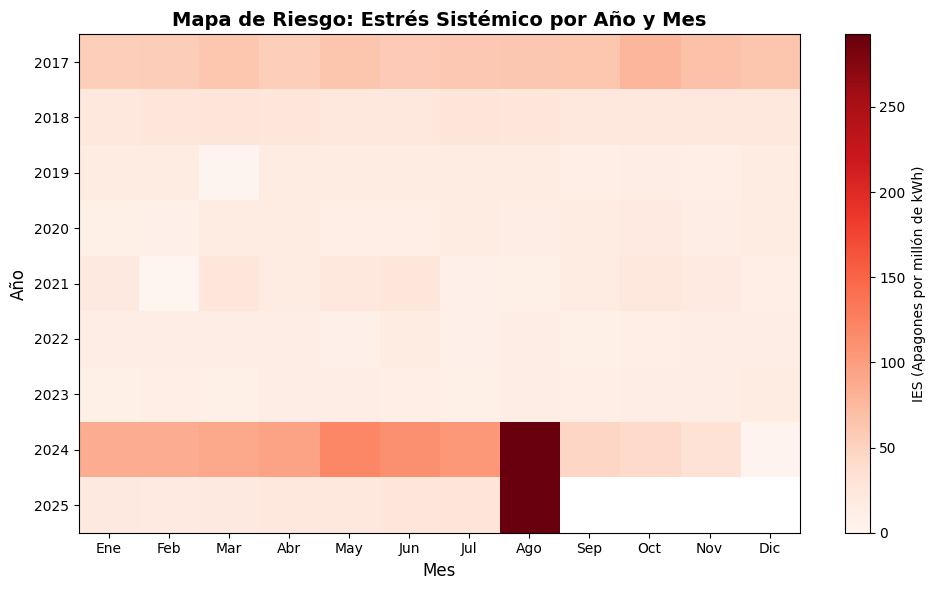

In [ ]:

pivot_ies = df.pivot_table(values='IES_MM_kWh', index='Año', columns='Mes', aggfunc='mean')

print("--- 6. Mapa de Riesgo Anual-Estacional (Matriz) ---")
print("Esta matriz es la base para tu visualización de Mapa de Calor.")
display(pivot_ies)

nombres_meses_cortos = [ 'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

plt.figure(figsize=(10,6))

plt.imshow(pivot_ies, cmap='Reds', aspect='auto')
plt.colorbar(label='IES (Apagones por millón de kWh)')
plt.title('Mapa de Riesgo: Estrés Sistémico por Año y Mes', fontsize=14, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Año', fontsize=12)
plt.xticks(np.arange(12), labels=nombres_meses_cortos)
plt.yticks(np.arange(len(pivot_ies.index)), labels=pivot_ies.index)
plt.tight_layout()
plt.show()

## Gráfico de Barras Estacional (Riesgo IES)


/tmp/ipython-input-1065046876.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


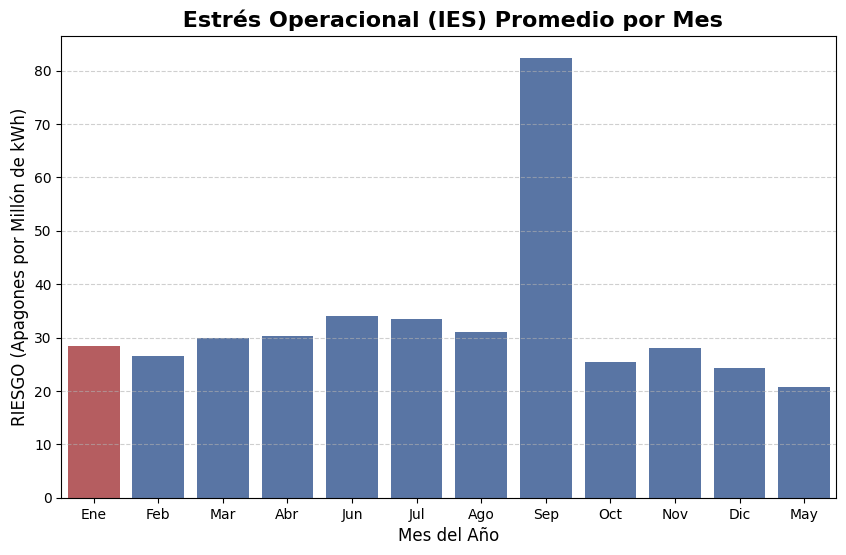

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


nombres_meses = {
    1: 'Ene',
    2: 'Feb',
    3: 'Mar',
    4: 'Abr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Ago',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dic'
}
riesgo_estacional['Mes_Nombre'] = riesgo_estacional['Mes'].map(nombres_meses)

plt.figure(figsize=(10, 6))


max_ies = riesgo_estacional['IES_PROMEDIO_MENSUAL'].max()
colores = ['#4c72b0' if val < max_ies else '#c44e52' for val in riesgo_estacional['IES_PROMEDIO_MENSUAL']]

sns.barplot(
    x='Mes_Nombre',
    y='IES_PROMEDIO_MENSUAL',
    data=riesgo_estacional.sort_values(by='Mes'),
    palette=colores)

plt.title(' Estrés Operacional (IES) Promedio por Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes del Año', fontsize=12)
plt.ylabel('RIESGO (Apagones por Millón de kWh)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



## Visualización de la relación consumo-apagones

Creamos un gráfico de doble eje que muestra la evolución temporal del consumo y los apagones,
permitiendo observar visualmente cómo se relacionan ambas variables a lo largo del tiempo.

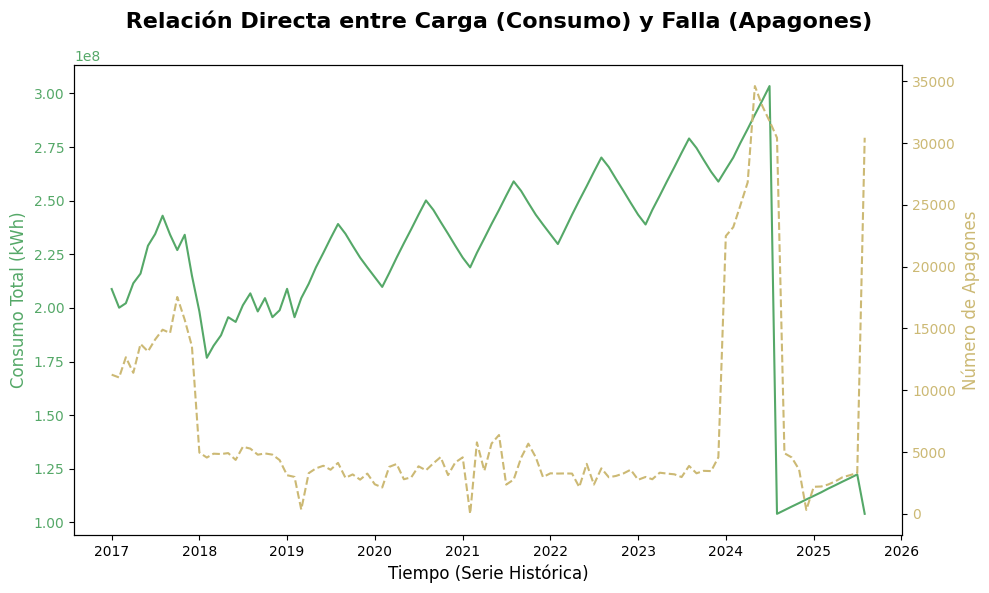

In [ ]:

df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].astype(str) + '-01')

fig, ax1 = plt.subplots(figsize=(10, 6))

color_consumo = '#55a868'
ax1.set_xlabel('Tiempo (Serie Histórica)', fontsize=12)
ax1.set_ylabel('Consumo Total (kWh)', color=color_consumo, fontsize=12)
ax1.plot(df['Fecha'], df['consumo'], color=color_consumo, label='Consumo (Carga)')
ax1.tick_params(axis='y', labelcolor=color_consumo)


ax2 = ax1.twinx()
color_apagones = '#ccb974'
ax2.set_ylabel('Número de Apagones', color=color_apagones, fontsize=12)
ax2.plot(df['Fecha'], df['apagones'], color=color_apagones, linestyle='--', label='Apagones (Falla)')
ax2.tick_params(axis='y', labelcolor=color_apagones)


fig.suptitle(' Relación Directa entre Carga (Consumo) y Falla (Apagones)', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()